In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\rajar\Downloads\EV_Data .csv")
print(df)
df.shape
df.info()

     Unnamed: 0  Age       City Profession Marital Status      Education  \
0             0   30      Nabha        NaN         Single       Graduate   
1             1   27       Pune        NaN         Single       Graduate   
2             2   32  Kashipur         NaN         Single       Graduate   
3             3   55       Pune   Business         Single       Graduate   
4             4   26     Satara        NaN         Single       Graduate   
..          ...  ...        ...        ...            ...            ...   
995         995   31       Pune        NaN        Married       Graduate   
996         996   29       Pune        NaN        Married  Post Graduate   
997         997   30     Mumbai   Business         Single       Graduate   
998         998   24  Ahmedabad        NaN        Married       Graduate   
999         999   30       Pune   Business         Single       Graduate   

     No. of Family members  Annual Income  \
0                        5   1.193876e+06 

In [3]:
df.isnull().sum()

Unnamed: 0                                                                0
Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference f

In [4]:
df['Profession'] = df['Profession'].fillna('None')

In [5]:
df.isnull().sum()

Unnamed: 0                                                              0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of  EV would you prefer?                         0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [6]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder
original_labels = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    original_labels[column] = label_encoder.classes_


In [9]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,18,1,1,0,5,1.193876e+06,0,3,2,4,6,2,0
1,27,26,1,1,0,4,1.844540e+06,2,3,2,3,4,4,2
2,32,15,1,1,0,4,2.948150e+06,2,1,2,5,4,4,2
3,55,26,0,1,0,3,2.832380e+06,0,1,1,4,6,4,1
4,26,29,1,1,0,4,2.638751e+06,2,4,2,10,4,4,2


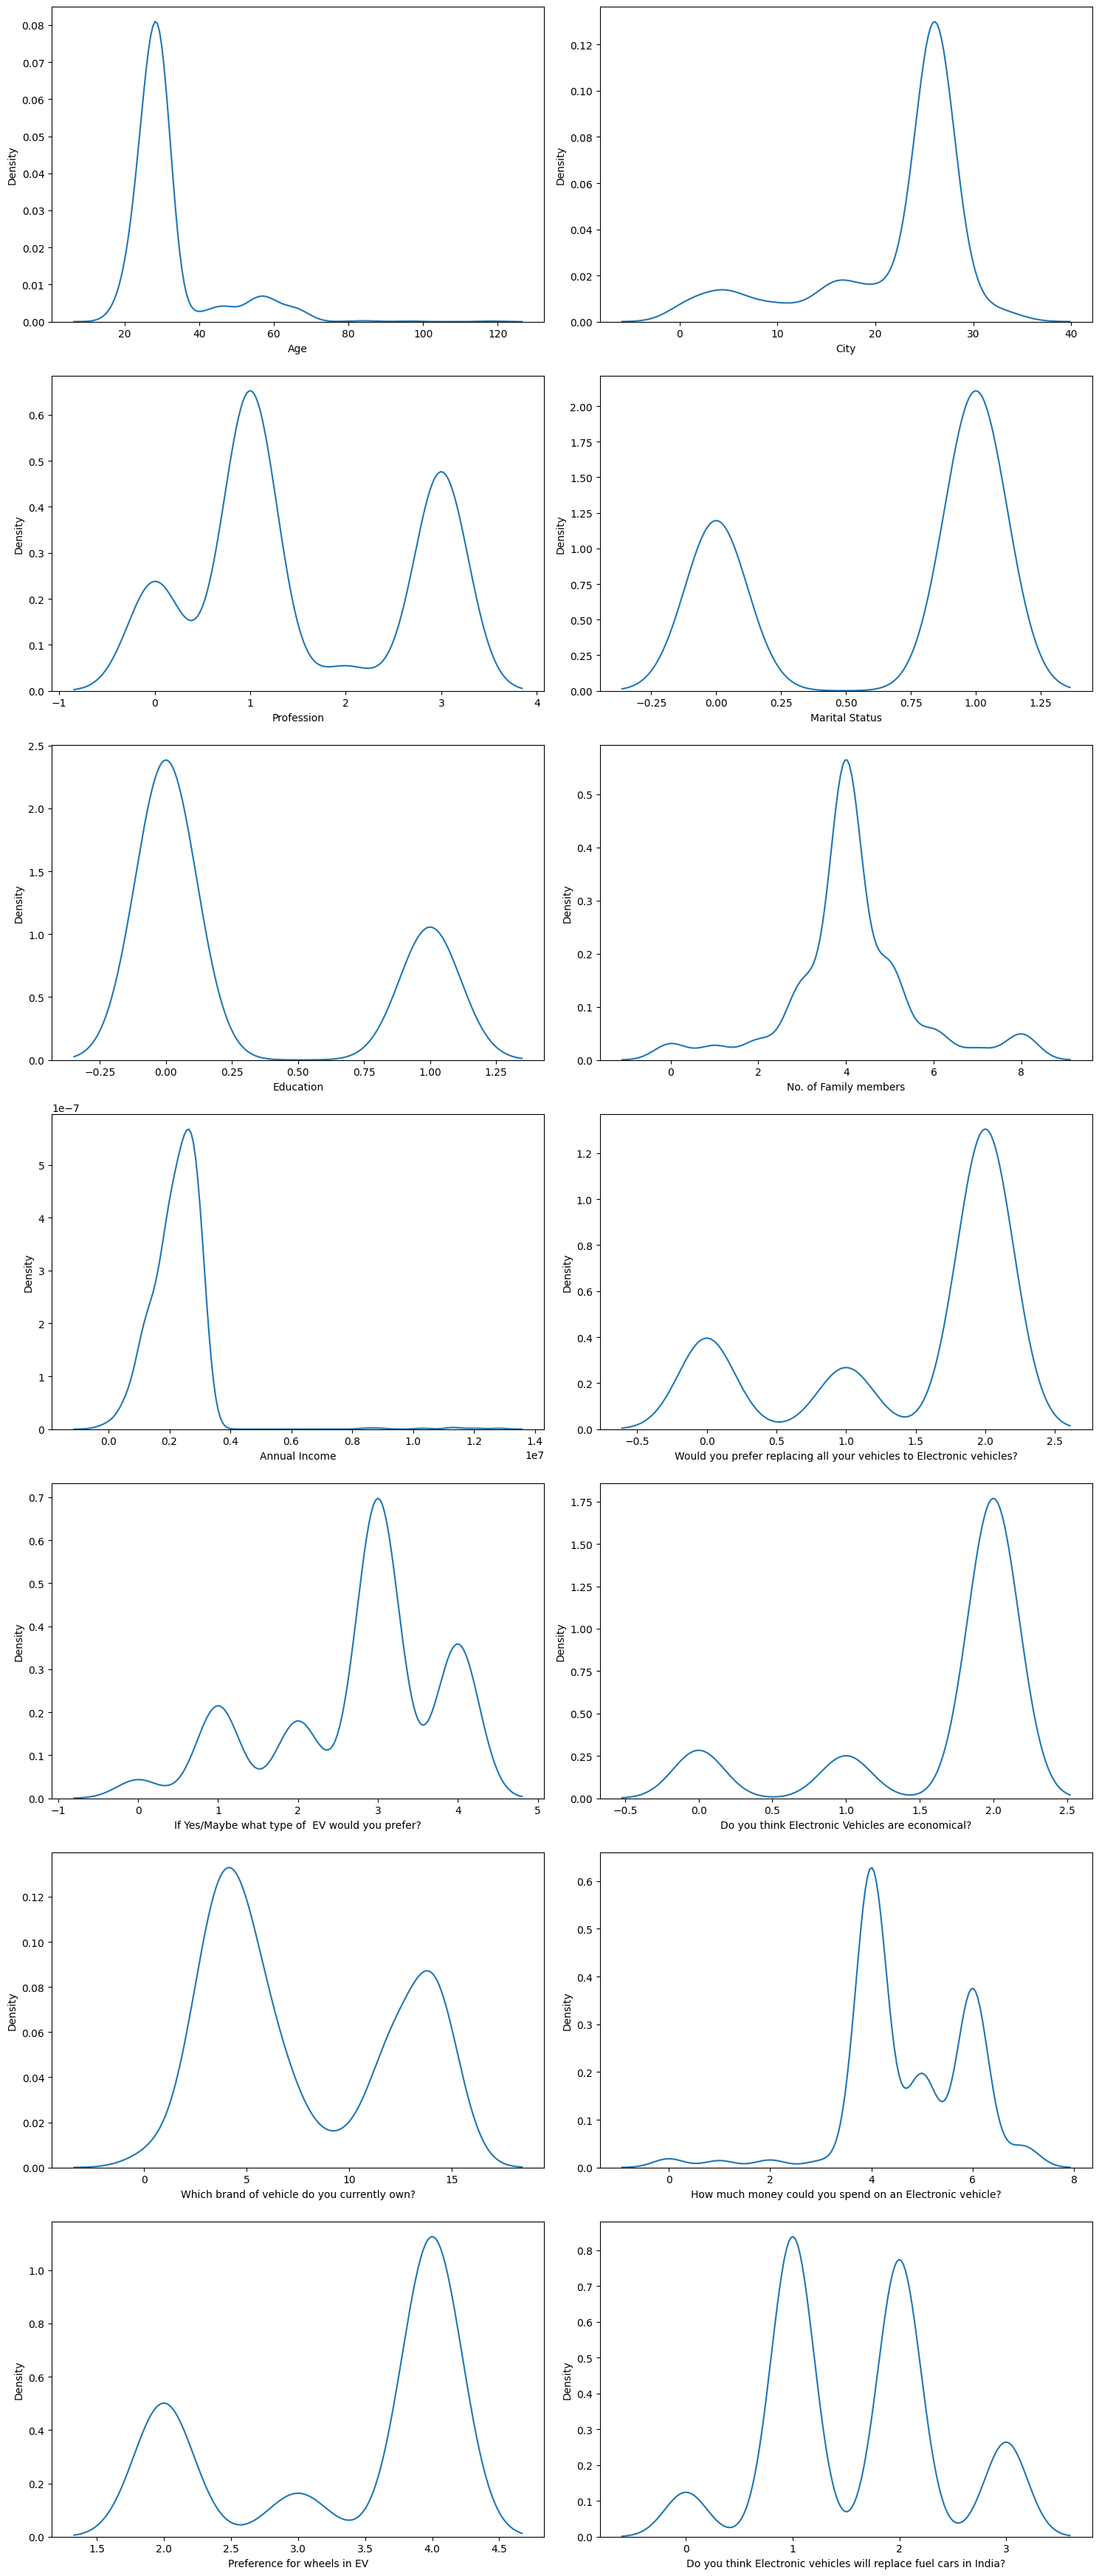

In [10]:
numeric_columns = df.select_dtypes(exclude='object').columns
num_plots = len(numeric_columns)
num_rows = (num_plots + 1) // 2 
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numeric_columns):
    ax = plt.subplot(num_rows, 2, i + 1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

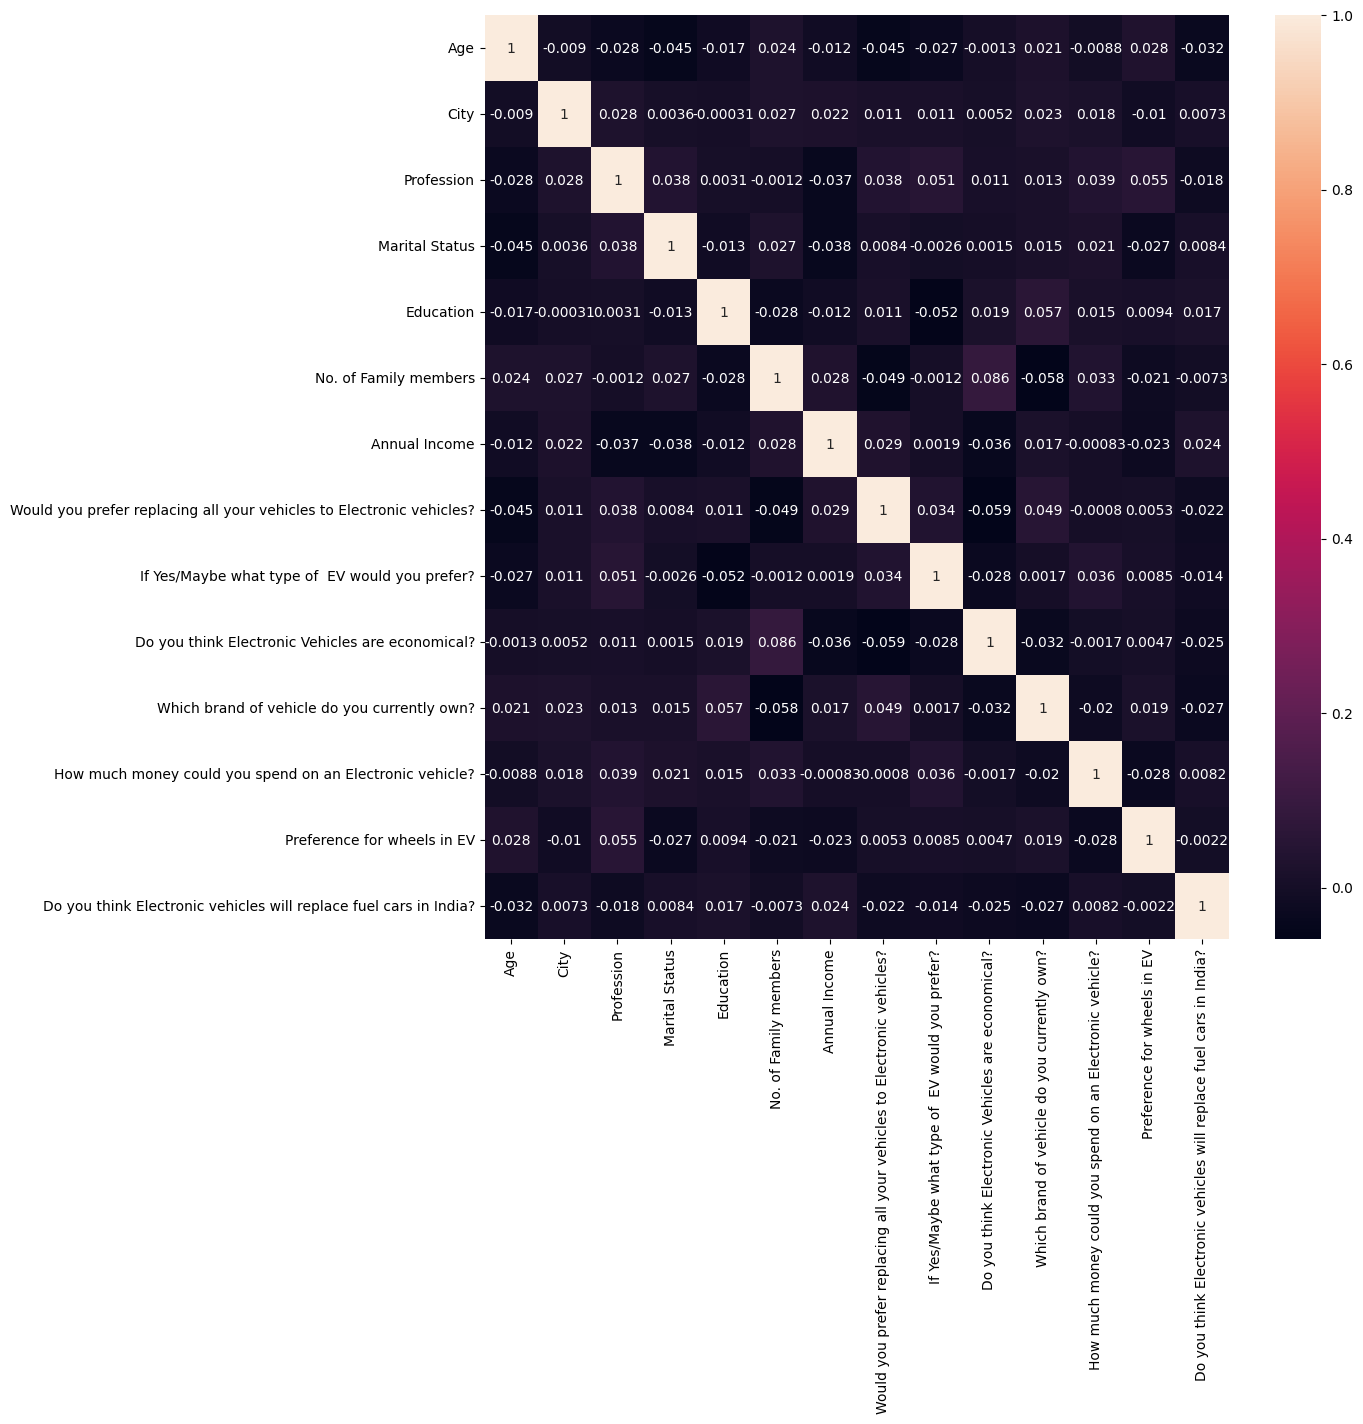

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
scaled_df = scalar.fit_transform(df)

In [13]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3"])
pca_df

,PCA1,PCA2,PCA3
0,-2.161916,1.076817,-0.251741
1,-0.232695,0.555251,0.100901
2,-0.500413,-0.830707,0.232096
3,-1.410649,-1.465792,0.096057
4,0.678365,0.698676,0.342357
...,...,...,...
995,-1.120077,0.506285,-0.120607
996,-0.527058,-0.198859,-0.460701
997,-0.505980,-0.268294,0.423744
998,-0.022148,-1.013542,-0.308876


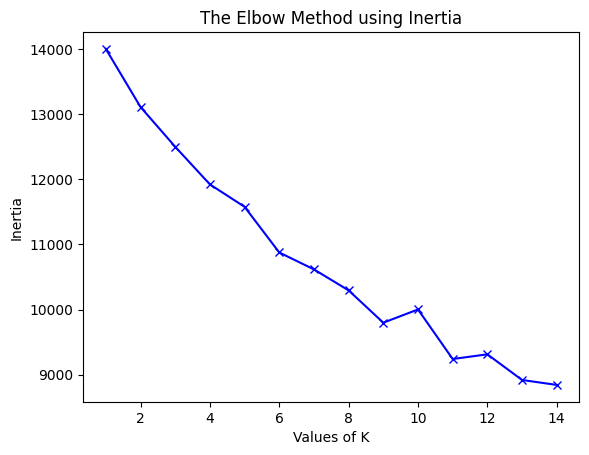

In [14]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [15]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

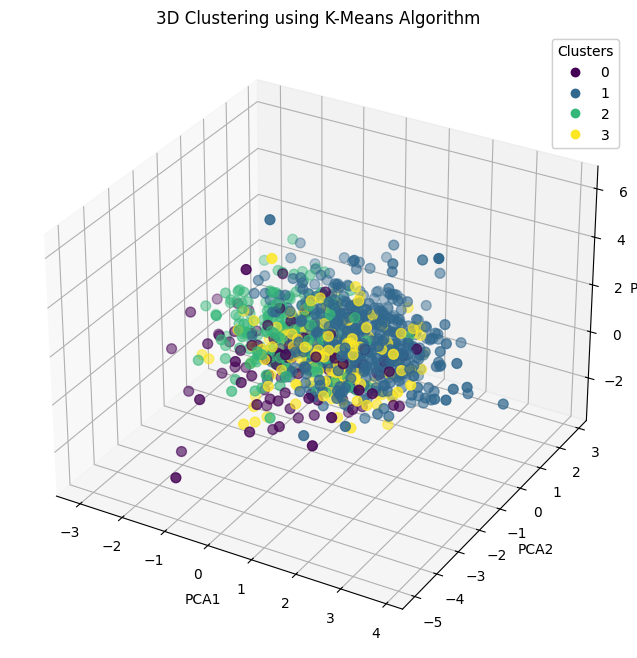

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_kmeans['PCA1'], pca_df_kmeans['PCA2'], pca_df_kmeans['PCA3'], c=pca_df_kmeans['cluster'], cmap='viridis', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D Clustering using K-Means Algorithm")
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [17]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,59.034188,22.982906,1.410256,0.632479,0.282051,4.239316,2.276751e+06,1.418803,2.666667,1.598291,8.316239,4.777778,3.299145,1.487179
1,27.775758,25.474747,1.670707,0.640404,0.325253,4.040404,2.327499e+06,1.949495,2.781818,1.597980,7.981818,4.664646,3.349495,1.602020
2,28.223684,24.346491,1.385965,0.640351,0.293860,4.355263,2.218296e+06,0.298246,2.653509,1.820175,7.333333,4.745614,3.328947,1.583333
3,29.431250,7.006250,1.462500,0.631250,0.287500,3.931250,2.087991e+06,1.643750,2.818750,1.575000,7.412500,4.706250,3.412500,1.631250


In [18]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,30,18,1,1,0,5,1.193876e+06,0,3,2,4,6,2,0,2
1,27,26,1,1,0,4,1.844540e+06,2,3,2,3,4,4,2,1
2,32,15,1,1,0,4,2.948150e+06,2,1,2,5,4,4,2,3
3,55,26,0,1,0,3,2.832380e+06,0,1,1,4,6,4,1,0
4,26,29,1,1,0,4,2.638751e+06,2,4,2,10,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,26,1,0,0,7,2.110722e+06,2,3,2,5,5,4,1,1
996,29,26,1,0,1,4,1.616288e+06,1,3,2,5,6,4,2,2
997,30,16,0,1,0,4,2.202829e+06,2,3,2,3,4,4,2,3
998,24,0,1,0,0,4,1.764744e+06,2,3,2,7,4,4,2,3


In [19]:
cluster_0_df = cluster_df[cluster_df["Cluster"]==0]
cluster_0_df

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
3,55,26,0,1,0,3,2.832380e+06,0,1,1,4,6,4,1,0
11,59,26,1,0,0,4,2.131353e+06,0,3,2,3,6,4,2,0
16,56,16,1,1,1,5,2.315667e+06,1,2,2,2,4,4,2,0
18,70,29,1,0,0,4,2.465153e+06,2,3,2,5,5,4,2,0
19,50,26,0,1,0,8,1.384334e+06,2,3,0,3,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,47,26,1,1,1,5,2.269370e+06,2,2,2,14,6,4,1,0
965,53,26,3,1,0,5,1.504387e+06,2,3,1,13,4,4,2,0
986,46,26,1,1,1,4,2.159064e+06,2,4,1,4,5,2,2,0
987,59,27,1,0,0,4,2.121948e+06,2,1,2,14,7,2,1,0


In [20]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==1]
cluster_1_df

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
1,27,26,1,1,0,4,1.844540e+06,2,3,2,3,4,4,2,1
4,26,29,1,1,0,4,2.638751e+06,2,4,2,10,4,4,2,1
6,23,26,3,0,0,3,2.686745e+06,2,4,2,5,4,2,1,1
7,25,26,1,0,1,4,2.034627e+06,2,4,2,6,6,4,1,1
8,43,24,1,1,0,2,2.040275e+06,2,3,2,15,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,33,26,3,0,1,4,3.368686e+06,2,3,1,12,4,2,2,1
989,27,24,1,0,1,1,2.682405e+06,2,4,0,3,4,4,2,1
990,24,26,1,0,0,4,1.729579e+06,2,3,2,12,5,2,2,1
992,30,26,0,1,0,4,2.167916e+06,2,3,0,11,4,3,1,1


In [21]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==2]
cluster_2_df

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,30,18,1,1,0,5,1.193876e+06,0,3,2,4,6,2,0,2
5,28,26,3,1,0,5,2.945694e+06,0,3,2,15,4,2,1,2
12,21,26,1,0,0,3,1.124975e+06,0,4,1,12,4,4,1,2
17,25,26,1,1,1,4,2.307404e+06,0,1,2,14,5,4,2,2
24,28,26,3,1,0,4,1.399537e+06,1,3,2,5,5,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,25,20,1,1,0,5,2.999348e+06,0,1,2,4,6,4,1,2
988,23,13,1,0,0,4,2.418253e+06,0,4,2,3,6,4,2,2
993,31,17,1,1,0,4,8.497166e+05,1,1,2,1,5,3,1,2
996,29,26,1,0,1,4,1.616288e+06,1,3,2,5,6,4,2,2


In [22]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==3]
cluster_3_df

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
2,32,15,1,1,0,4,2.948150e+06,2,1,2,5,4,4,2,3
10,26,5,3,1,0,3,2.457488e+06,2,2,2,14,4,4,1,3
25,28,11,3,0,1,3,2.269262e+06,2,1,2,4,6,4,3,3
34,30,10,1,1,0,3,2.369644e+06,2,1,2,12,4,4,2,3
35,30,1,1,1,0,4,1.897616e+06,2,3,2,4,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,30,3,1,1,0,4,1.009305e+06,0,3,2,4,4,2,3,3
981,30,6,1,1,0,4,2.387842e+06,0,1,2,12,4,2,3,3
991,42,1,1,1,1,4,1.153312e+06,0,3,2,3,6,4,2,3
997,30,16,0,1,0,4,2.202829e+06,2,3,2,3,4,4,2,3


<Axes: xlabel='Cluster', ylabel='count'>

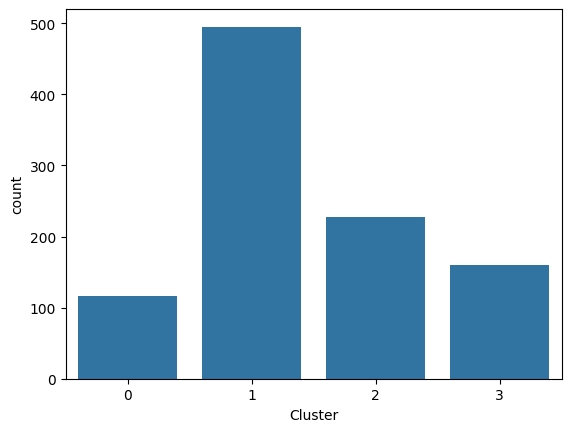

In [23]:
sns.countplot(x='Cluster', data=cluster_df)

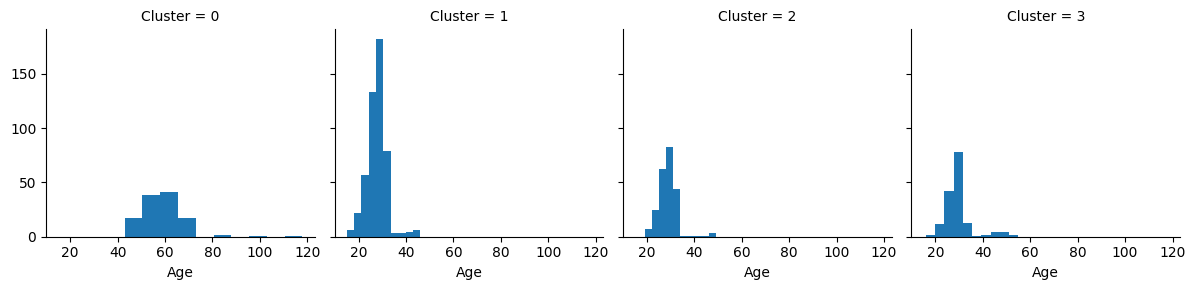

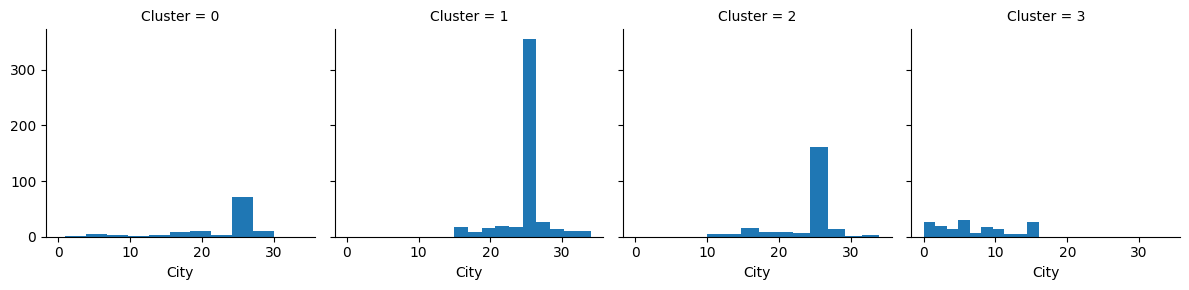

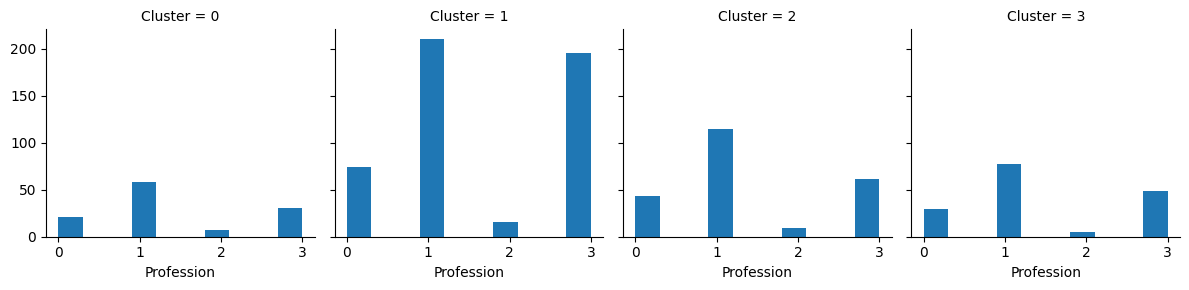

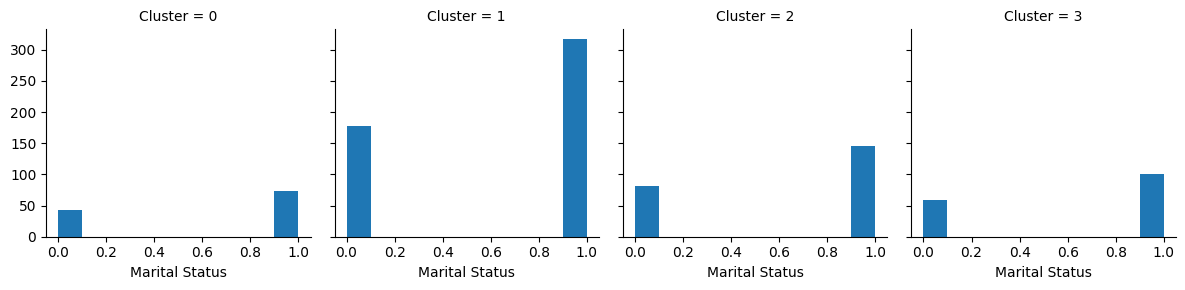

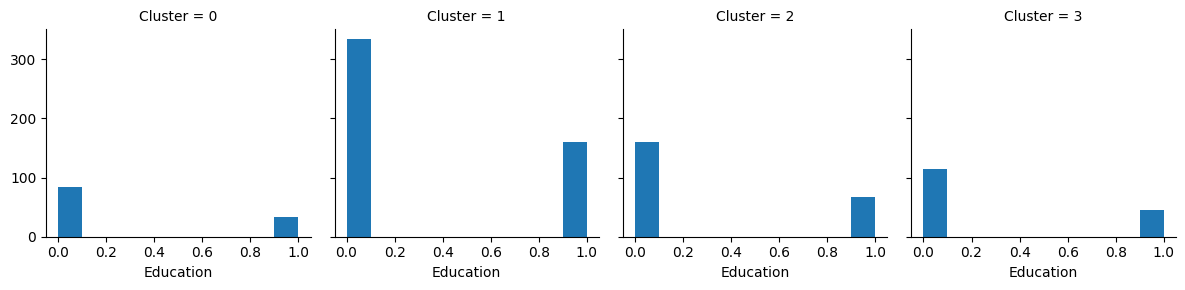

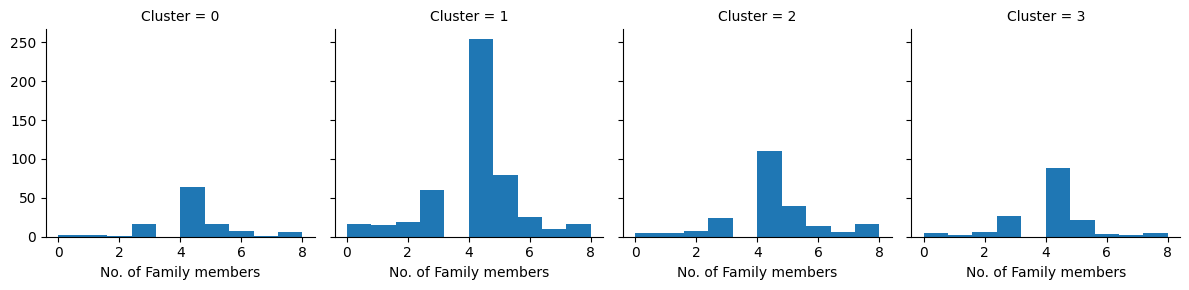

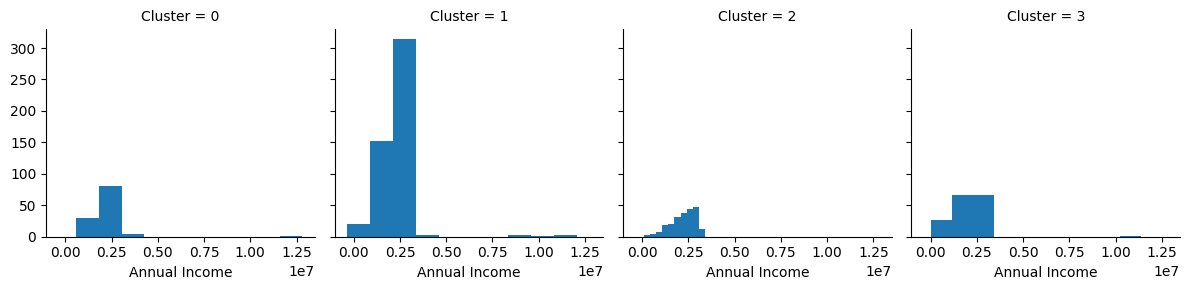

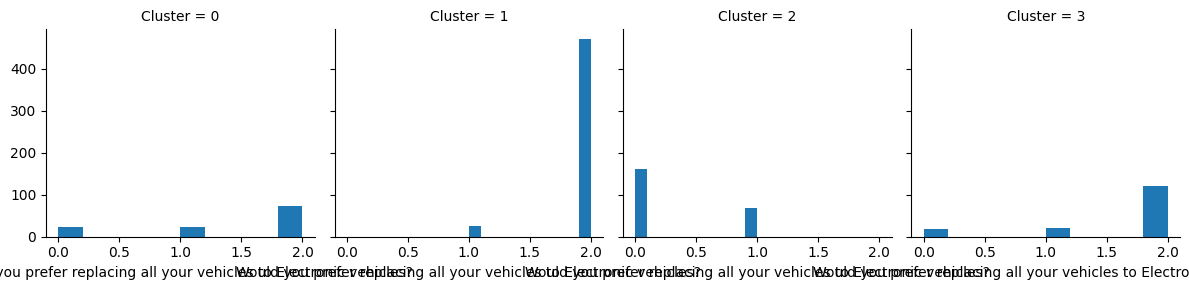

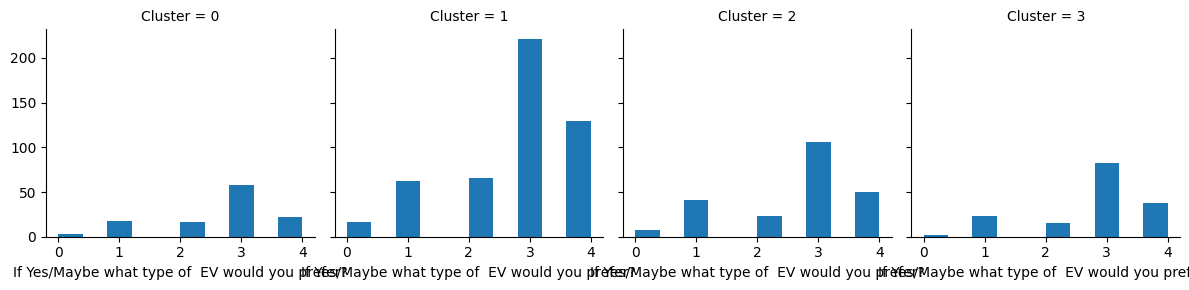

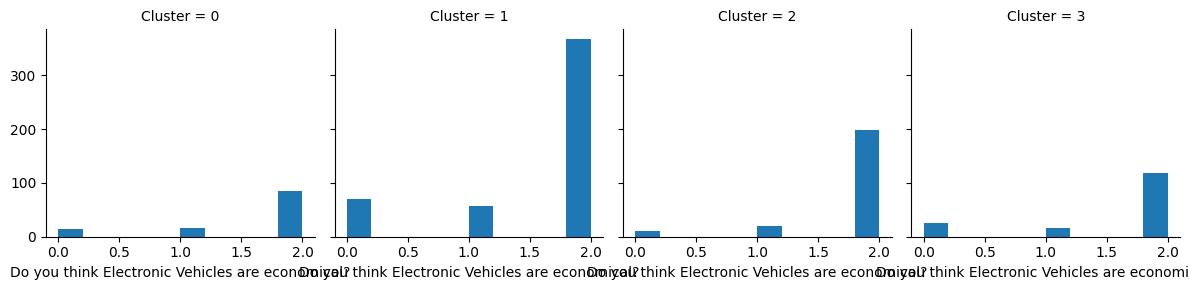

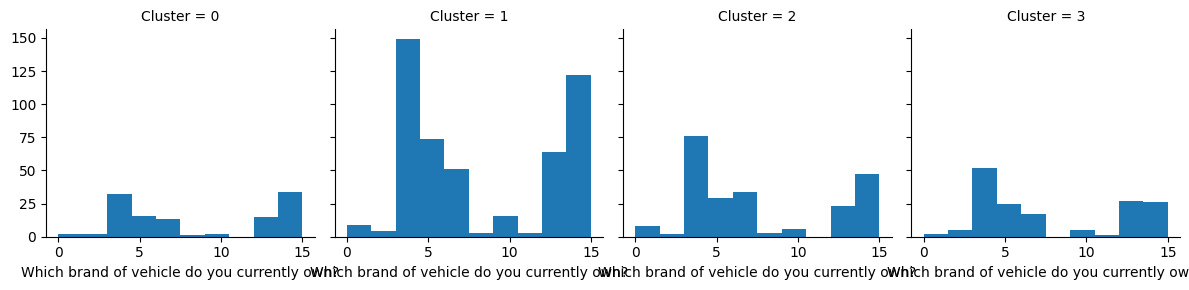

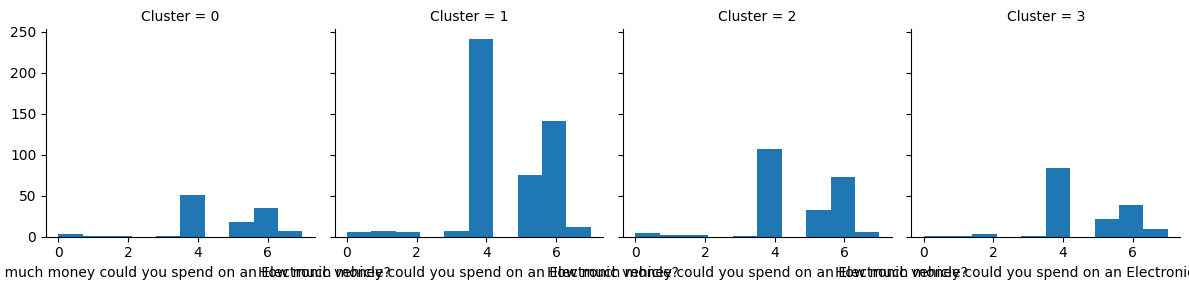

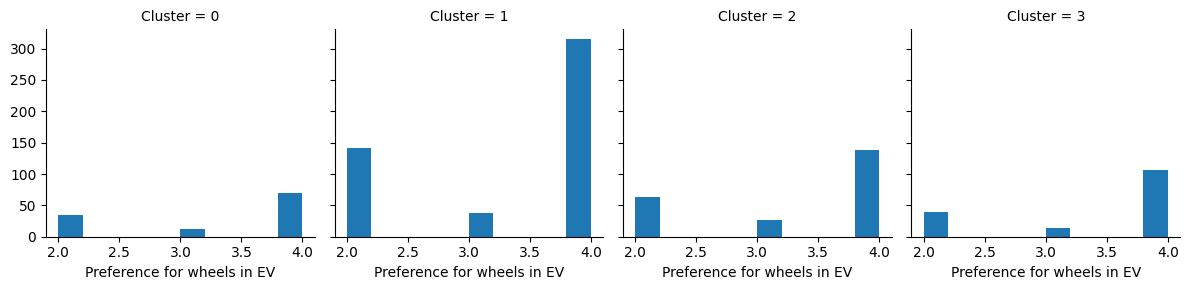

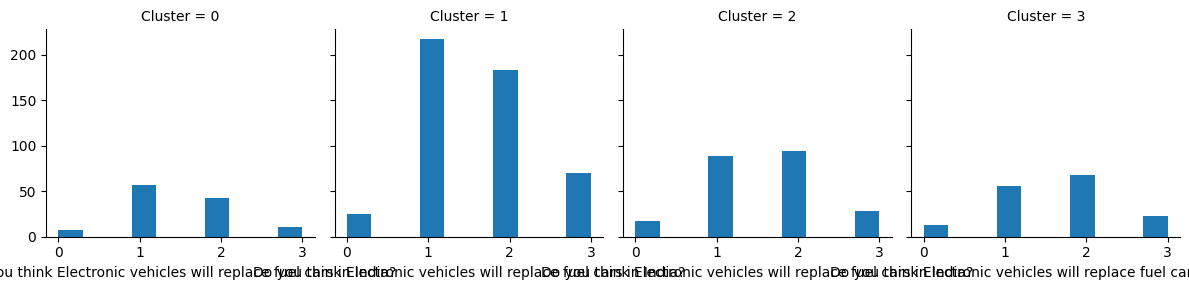

In [24]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [25]:
for column in cluster_df.select_dtypes(include=['int64']).columns:
    if column in original_labels:
        le = LabelEncoder()
        le.classes_ = original_labels[column]  
        cluster_df[column] = le.inverse_transform(cluster_df[column])


In [26]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [27]:
cluster_df.to_csv("Clustered_Customer_Data_demographic.csv")

In [28]:
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [29]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 36   2   0   1]
 [  0 143   6   3]
 [  3   1  53   2]
 [  0   3   0  47]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.96      0.94      0.95       152
           2       0.90      0.90      0.90        59
           3       0.89      0.94      0.91        50

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300



In [36]:
import pickle
from sklearn.metrics import accuracy_score
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)
print(accuracy_score(y_test,y_pred),'% Accuracy')

[1 1 1 0 2 1 1 2 3 1 3 1 0 3 1 1 1 3 2 3 1 3 1 3 1 3 3 2 2 1 3 0 1 2 2 1 1
 3 1 3 2 0 1 3 2 0 2 2 1 1 1 1 0 1 0 1 1 3 2 3 1 3 2 1 1 0 2 1 2 1 3 1 0 0
 1 2 1 1 1 1 1 3 2 1 3 3 2 3 0 2 2 1 1 1 0 1 2 1 1 1 3 1 3 1 2 1 3 3 1 1 1
 1 2 2 0 2 3 1 1 0 2 1 1 1 1 1 1 0 1 1 3 3 3 0 1 1 0 1 0 1 1 3 1 1 0 1 3 1
 1 1 3 1 1 1 3 1 1 2 3 0 1 1 0 1 2 1 2 0 1 0 1 1 1 2 1 1 3 2 1 1 1 3 1 1 1
 3 1 1 0 1 2 3 3 0 1 1 3 1 1 1 1 1 1 2 2 0 1 3 1 1 1 1 1 2 1 2 2 2 0 1 1 2
 2 2 2 1 3 2 1 2 2 1 1 1 2 1 3 1 1 3 0 1 0 0 3 2 2 1 0 1 0 1 3 3 1 1 1 1 3
 1 1 2 2 1 3 1 3 0 1 1 1 1 2 0 0 2 0 2 2 0 2 1 3 3 2 1 3 0 1 0 2 1 1 2 1 1
 1 2 1 1]
0.93 % Accuracy
